In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Esercizio 2.1

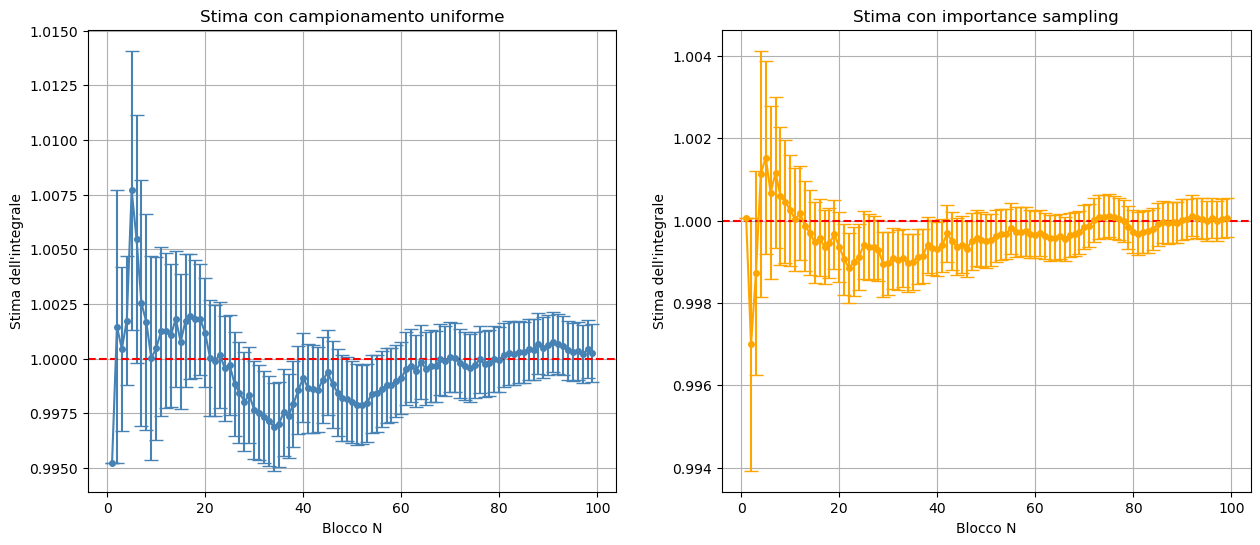

In [7]:
array1 = []
array2 = []
array3 = []

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

with open("OUTPUT/results_integral_uniform", "r") as file:
  for line in file:
      num1, num2, num3 = map(float, line.split())
      array1.append(num1)
      array2.append(num2)
      array3.append(num3)

ax[0].errorbar(array3, array1, yerr = array2, fmt='o-', capsize=5, markersize = 4, color = "steelblue")
ax[0].set_xlabel("Blocco N")
ax[0].set_ylabel("Stima dell'integrale")
ax[0].set_title("Stima con campionamento uniforme")
ax[0].axhline(y=1, color='red', linestyle='--')
ax[0].grid(True)

array1.clear()
array2.clear()
array3.clear()

with open("OUTPUT/results_integral_importance", "r") as file:
  for line in file:
      num1, num2, num3 = map(float, line.split())
      array1.append(num1)
      array2.append(num2)
      array3.append(num3)

ax[1].errorbar(array3, array1, yerr = array2, fmt='o-', capsize=5, markersize = 4, color = "orange")
ax[1].set_xlabel("Blocco N")
ax[1].set_ylabel("Stima dell'integrale")
ax[1].set_title("Stima con importance sampling")
ax[1].axhline(y=1, color='red', linestyle='--')
ax[1].grid(True)

L'esercizio ha lo scopo di stimare il valore dell'integrale proposto tramite due metodi.

A sinistra sono presentati i risultati della stima campionando uniformemente valori tra gli estremi di integrazione.

A destra sono presentati i risultati della stima tramite importance sampling, dove come densità ausiliaria ho usando la funzione y = 2(1-x).

In entrambi i casi la migliore stima è ottenuta runtime mediando le medie di blocco e associando la relativa incertezza sulla media utilizzando la tecnica di data blocking su 100000 lanci suddivisi in 100 blocchi.

La principale differenza tra i due metodi è che utilizzando l'importance sampling con una densità che assomigli all'integranda si riduce la varianza del campione di medie di blocco. 

---

# Esercizio 2.2

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:50: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:50: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_5325/4157236013.py:24: SyntaxWarning: invalid escape sequence '\s'
  ax[0].set_ylabel('$\sqrt{<|r_N|^2>}$')
/tmp/ipykernel_5325/4157236013.py:50: SyntaxWarning: invalid escape sequence '\s'
  ax[1].set_ylabel('$\sqrt{<|r_N|^2>}$')


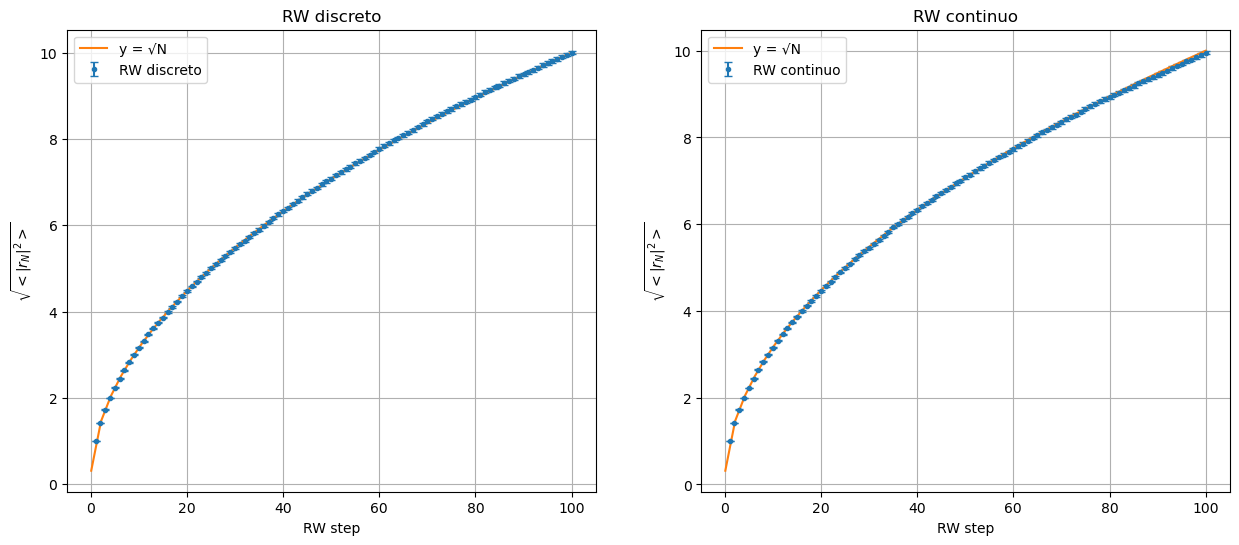

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
x_data = np.linspace(0.1, 100, 50)

filename = "OUTPUT/results_lattice_walk"

x = []
y = []
err = []

with open(filename, 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 3:
            y.append(float(parts[0]))
            err.append(float(parts[1]))
            x.append(float(parts[2]))

x = np.array(x)
y = np.array(y)
err = np.array(err)

ax[0].errorbar(x, y, yerr=err, fmt='.', capsize=3, label='RW discreto')
ax[0].set_xlabel('RW step')
ax[0].set_ylabel('$\sqrt{<|r_N|^2>}$')
ax[0].set_title('RW discreto')
ax[0].plot(x_data, x_data**0.5, label = "y = √N")
ax[0].grid(True)
ax[0].legend()

filename = "OUTPUT/results_continuum_walk"

x = []
y = []
err = []

with open(filename, 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 3:
            y.append(float(parts[0]))
            err.append(float(parts[1]))
            x.append(float(parts[2]))

x = np.array(x)
y = np.array(y)
err = np.array(err)

ax[1].errorbar(x, y, yerr=err, fmt='.', capsize=3, label='RW continuo')
ax[1].set_xlabel('RW step')
ax[1].set_ylabel('$\sqrt{<|r_N|^2>}$')
ax[1].set_title('RW continuo')
ax[1].grid(True)
ax[1].plot(x_data, x_data**0.5, label = "y = √N")
ax[1].legend()

Lo scopo dell'esercizio è mostrare che un random walk in tre dimensioni su reticolo e nel continuo si disperde diffusivamente. Come stima della dispersione è usato lo scarto quadratico medio del modulo della distanza

A sinistra è mostrata la radice dello spostamento quadratico medio in funzione dello step del RW nel caso di spostamento su reticolo.

A destra è mostrata la radice dello spostamento quadratico medio in funzione dello step del RW nel caso di spostamento nel continuo.

In entrambi i casi quello che ho fatto è simulare un cammino alla volta calcolando le medie di blocco dello spostamento quadratico di ogni step del percorso. Il risultato finale è la media di 100 medie di blocco con relativa incertezza per ogni step dei due tipi di cammini, ottenendo i risultati nelle figure.

Quello che si nota immediatamente è che la radice dello spostamento quadratico medio è in perfetta forma diffusiva, sovrapponendosi con la soluzione dell'equazione di diffuzione.